#                                      **Project -: Twitter Sentiment Analysis**
                              Name : Ananya
                              University RollNo. : 2016632
                              University : Graphic Era Deemed to be University

### Load and Analyze Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('tweet_data.csv')

In [3]:
#Use the sample method to look at some random tweets present in our dataset
df.sample(10)

,textID,tweet_text,sentiment
10220,1694275651,@simonrim off to the cheese counter I go! Thanks,positive
11702,1694976235,@hi_sweetye I hope so,positive
5368,1963181218,@KeytaJ yeah...she passed last week. so sad!,negative
12294,1695344135,@rockeye I might give it another go.,positive
13725,1751252371,Nothin better then ridin in a car with your si...,positive
400,1957154220,"@soverpeck dude, i didn't know it was a person...",negative
10010,1694182414,@tommcfly aww we love you too,positive
17797,1753584095,@mariamtronchoni Have a nice Sunday xx,positive
6764,1964458623,@Impala_Guy In the past it was ok but since iï...,negative
10931,1694570788,@MaverickNY Thank you!!,positive


In [4]:
#Check how many tweets there are in total
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


In [5]:
#Print tweet and its Sentiment based on a tweet ID
tweet_id = 4000
tweet = df.iloc[tweet_id]
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Oh dear. Sunburned back
Tweet sentiment: negative


## Data Visualization

### Matplotlib

In [6]:
import matplotlib.pyplot as plt

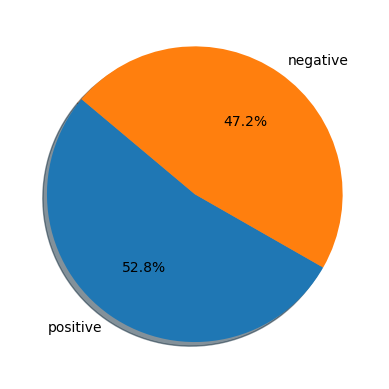

In [7]:
#Distribution of tweets over the dataset
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [8]:
#Count number of positive and negative tweets
print("Number of Positive tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of Negative tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of Positive tweets: 9897
Number of Negative tweets: 8830


### WordCloud

In [10]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
from wordcloud import WordCloud

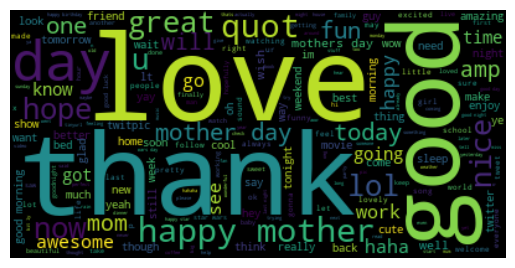

In [12]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

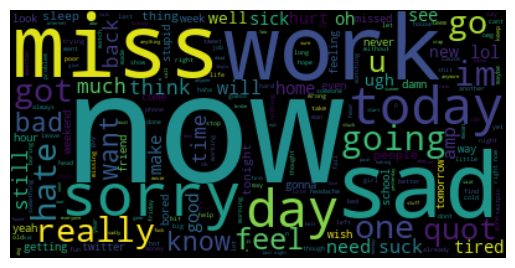

In [13]:
neg_tweets = df[df["sentiment"]=="negative"]
txt1 = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Text Normalization

In [14]:
import re

### Handle RT tag

In [15]:
def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

### Handle @User Tag

In [16]:
def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet

### Handle Emojis

In [18]:
pip install emoji

     -------------------------------------- 240.9/240.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=e7b318fa8cd15ef4d7b8fd8fc45333e003235fcff0170ec2464d5cd79789ec76
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [19]:
import emoji

In [20]:
def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

### Handle URLs

In [21]:
def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

### Handle Hashtags

In [22]:
def replace_hashtag(tweet, default_replace=""):
    tweet = re.sub('#+', default_replace, tweet)
    return tweet

### Word Features

#### Remove Upper Capitalization

In [23]:
def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

#### Remove Word Repetition

In [24]:
def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

#### Remove Punctuation Repetition

In [25]:
def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace, tweet)
    return tweet

#### Word Contractions

In [26]:
pip install contractions

     -------------------------------------- 287.5/287.5 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
import contractions

In [28]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [29]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

### Tokenization

In [30]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [31]:
import nltk
from nltk.tokenize import word_tokenize

In [32]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [33]:
import string

In [34]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [39]:
import re  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, STOPWORDS  

In [40]:
from nltk.corpus import stopwords

In [48]:
from wordcloud import WordCloud

In [49]:
#python -m nltk.downloader stopwords

In [50]:
#import nltk
#nltk.download('stopwords')

In [51]:
# Create set of english stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\lenovo/nltk_data'
    - 'C:\\Users\\lenovo\\anaconda3\\nltk_data'
    - 'C:\\Users\\lenovo\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\lenovo\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Remove some stopwords from the set
stop_words.discard('not')
print(stop_words)

In [ ]:
# Create a custom_tokenize function
def custom_tokenize(tweet, 
                        keep_punct = False,
                        keep_alnum = False,
                        keep_stop = False):
  token_list = word_tokenize(tweet)
  if not keep_punct:
    token_list = [token for token in token_list 
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

### Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Create a stem_tokens function that takes the list of tokens as input and returns a list of stemmed tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

### Putting all together

In [ ]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

## Text Representation

In [ ]:
pip install -U scikit-learn

#### Processing Tweets 

In [ ]:
# Convert sentiment to 1  for "positive" and 0 for "negative" sentiment
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1 if i=="positive" else 0)

In [ ]:
df.head(10)

In [ ]:
# Convert Dataframe to two list: One for tweet tokens(X) and one for the tweet sentiment (y)
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [ ]:
print(X)
print(y)

#### Positive/Negative Frequency 



In [ ]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [ ]:
#Create a tweet_to_freqs function used to convert tweets to a 2-d array by using the frequency dictionnary
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [ ]:
def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

#### Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create fit_cv function used to build the Bag of Words vectorizer with the corpus
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer= lambda x: x, preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

#### TF-IDF (Term Frequency - Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create a fit_tfidf function to build the TF-IDF vectorizer with the corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x:x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

##### Helper Function

In [ ]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

## Train-Test Split

In [ ]:
print(X)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use the train_test_split function to split arrays of X and y into training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [ ]:
# Print the size of these new variables
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create fit_lr function used to fit a Logistic Regression model on X and y training data
def fit_lr(X_train, y_train):
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)
  return model

#### Positive/Negative Frequency

In [ ]:
freqs = build_freqs(X_train, y_train)

In [ ]:
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

In [ ]:
# Fit the Logistic Regression model
model_lr_pn = fit_lr(X_train_pn, y_train)
# Print the model coeffiecients
print(model_lr_pn.coef_, model_lr_pn.intercept_)

#### Count Vectorizer(Bag of Words)

In [ ]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
# Fit the Logistic Regression Model 
model_lr_cv = fit_lr(X_train_cv, y_train)

#### TF-IDF Vector

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [ ]:
model_lr_tf = fit_lr(X_train_tf, y_train)

## Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Positive/Negative Frequency

In [ ]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [ ]:
# Print the model accuracy by comparing predictions and real sentiments
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

In [ ]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### Count Vector(Bag of Words)

In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [ ]:
# Print the model accuracy by comparing predictions and real sentiments
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

In [ ]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

### TF-IDF Vector

In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [ ]:
# Print the model accuracy by comparing predictions and real sentiments
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

In [ ]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## Mini Pipeline

In [ ]:
#Create a predict_tweet function used to pre-process,transform and predict tweet sentiment
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [ ]:
your_tweet = input("Enter Tweet for Sentiment check: ")

In [ ]:
predict_tweet(your_tweet)

#                               Thank You!